In [1]:
from opensees.library import uniaxial
from opensees.section import patch, layer, section
from opensees.units.english import psi, ksi, pcf, inch, ft
import opensees.units.english
import numpy as np
from math import sqrt

In [2]:
# Linear concrete model
fc   = 5.0 * ksi
weight = 145 * pcf
# nominal concrete compressive strength
Ec = 57*ksi*sqrt(fc/psi)   # Concrete Elastic Modulus
# unconfined concrete
fc1U = fc                  # unconfined concrete maximum stress
eps1U = -0.003             # strain at maximum strength of unconfined concrete
fc2U = 0.2*fc1U            # ultimate stress
eps2U = -0.01              # strain at ultimate stress
_lambda = 0.1              # ratio between unloading slope at eps2 and initial slope Ec
# tensile-strength properties
ftU = 0.10*fc1U            # tensile strength +tension
Ets = ftU/0.002            # tension softening stiffness

Fy = 66.8*ksi      # yield stress
Es = 29000.*ksi    # modulus of steel
Bs = 0.005         # strain-hardening ratio 
R0 = 18            # control transition from elastic to plastic branches
cR1 = 0.925        # control transition from elastic to plastic branches
cR2 = 0.15         # control transition from elastic to plastic branches
reinf = uniaxial.Steel02(Fy, Es, Bs, R0, cR1, cR2)  

Ec = 33*(weight/pcf)**1.5*sqrt(fc / psi) * psi


# TODO: cover concrete
cover_concrete = core_concrete = uniaxial.Concrete02(-fc1U, eps1U,-fc2U, eps2U, _lambda, ftU, Ets)

col_cover = (3 + 1/8) * inch
core_radius = (5/2*ft - col_cover)

column_reinf_section = section.FiberSection(1e6, [    
    *section.ConfiningPolygon(8, 5/2*ft, core_radius, s=4, divs=(4,3), material=cover_concrete).patches,
    patch.circ(extRad=core_radius, material=core_concrete, divs=(5,4,12), rule="uniform-3"),
    layer.circ(radius=core_radius-11/8/2*inch, divs=36, bar="11", material=reinf, units=opensees.units.english)
])


AttributeError: 'NoneType' object has no attribute 'getStressResultant'

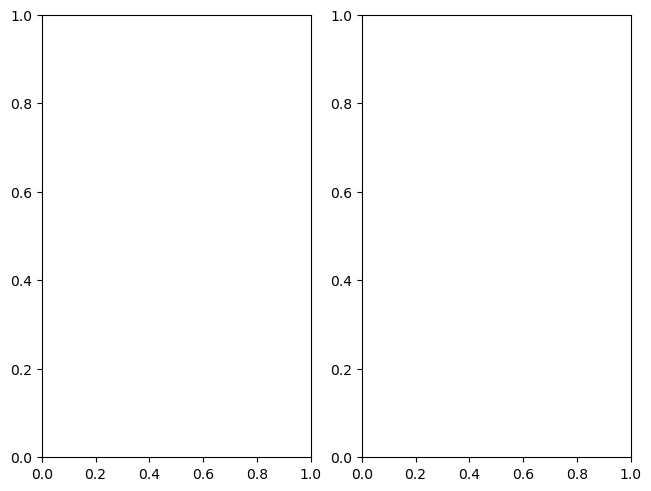

In [3]:
section.MomentAxialLocus(column_reinf_section, axial=np.linspace(1000000, -12000000, 15)).analyze()